# 1.IMPORTIG LIBRARIES & LOADING DATA

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import plotly.express as px

In [48]:
#LOADING DATA
data=pd.read_csv('/content/cleaned_list.csv')

In [49]:
#CHECK DATA TYPES BEFORE CORRELATION ANALYSIS
data.dtypes

Country                object
Internet Users          int64
Population              int64
Population rank         int64
Percentage              int64
Internet users rank     int64
dtype: object

#2.UNDERSTANDING VARIABLES AND CORRELATIONS







## **CORRELATION MATRIX**

In [50]:
#dataframe correlation
data.corr(method='spearman')

<ipython-input-50-0b1275de715e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,Internet Users,Population,Population rank,Percentage,Internet users rank
Internet Users,1.000000,0.928508,-0.999796,0.112828,-0.112302
Population,0.928508,1.000000,-0.928477,-0.199333,0.203082
Population rank,-0.999796,-0.928477,1.000000,-0.112710,0.112663
Percentage,0.112828,-0.199333,-0.112710,1.000000,-0.979309
Internet users rank,-0.112302,0.203082,0.112663,-0.979309,1.000000


In [51]:
#converting the categorical into numerical
df_num= data
for col_name in df_num.columns:
    if(df_num[col_name ].dtype == 'object'):
     df_num[col_name] = df_num [col_name].astype('category')
     df_num[col_name] = df_num[ col_name].cat.codes
df_num
print(df_num)

     Country  Internet Users  Population  Population rank  Percentage  \
0         40       765367947  1409517397                1          54   
1         84       461347554  1339180127                2          34   
2        205       244090854   324459463                3          75   
3         26       141206801   209288278                4          67   
4         93       115845120   127484450                5          90   
..       ...             ...         ...              ...         ...   
210       60            2881        2910              211          99   
211      127            2833        5177              212          54   
212      211            1383       11773              213           8   
213      140            1034        1618              214          86   
214       10             361         806              215          41   

     Internet users rank  
0                    116  
1                    145  
2                     68  
3              

## **RELATIONSHIP BETWEEN VARIABLES**

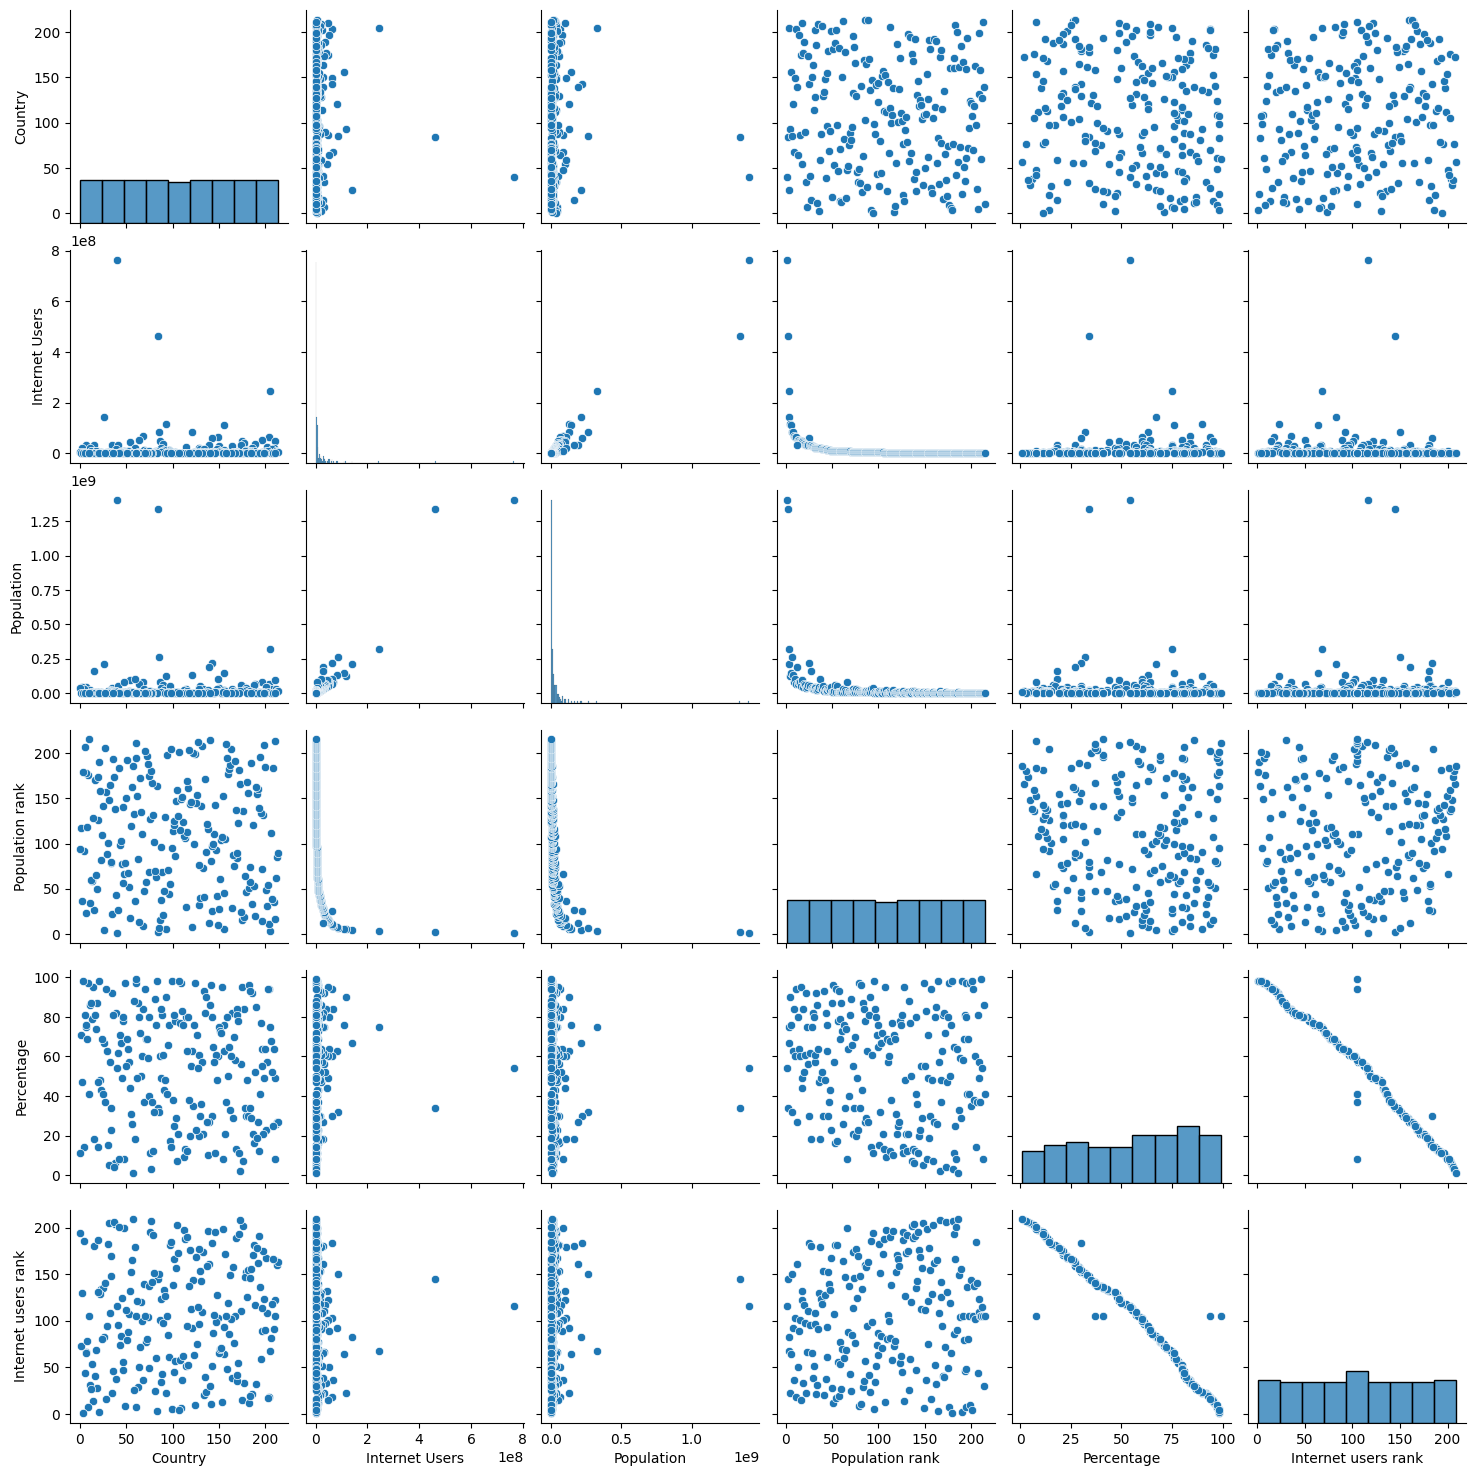

In [52]:
sns.pairplot(df_num)

## **STRENGTH OF CORRELATION**

In [53]:
df_num.corr()

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
Country,1.000000,-0.030505,-0.044489,-0.065063,-0.109699,0.095986
Internet Users,-0.030505,1.000000,0.959814,-0.377877,0.036930,-0.022842
Population,-0.044489,0.959814,1.000000,-0.350031,-0.053479,0.065895
Population rank,-0.065063,-0.377877,-0.350031,1.000000,-0.126498,0.111553
Percentage,-0.109699,0.036930,-0.053479,-0.126498,1.000000,-0.976793
Internet users rank,0.095986,-0.022842,0.065895,0.111553,-0.976793,1.000000


Calculate the Pearson correlation coefficient between each pair of variables. The Pearson correlation coefficient measures the linear relationship between two variables.



In [54]:
df_num.corr(method='spearman')

,Country,Internet Users,Population,Population rank,Percentage,Internet users rank
Country,1.000000,0.065126,0.078640,-0.065063,-0.114604,0.097145
Internet Users,0.065126,1.000000,0.928508,-0.999796,0.112828,-0.112302
Population,0.078640,0.928508,1.000000,-0.928477,-0.199333,0.203082
Population rank,-0.065063,-0.999796,-0.928477,1.000000,-0.112710,0.112663
Percentage,-0.114604,0.112828,-0.199333,-0.112710,1.000000,-0.979309
Internet users rank,0.097145,-0.112302,0.203082,0.112663,-0.979309,1.000000


## **STRENGTH OF CORRELATION BY VISUALIZATION**

<Axes: >

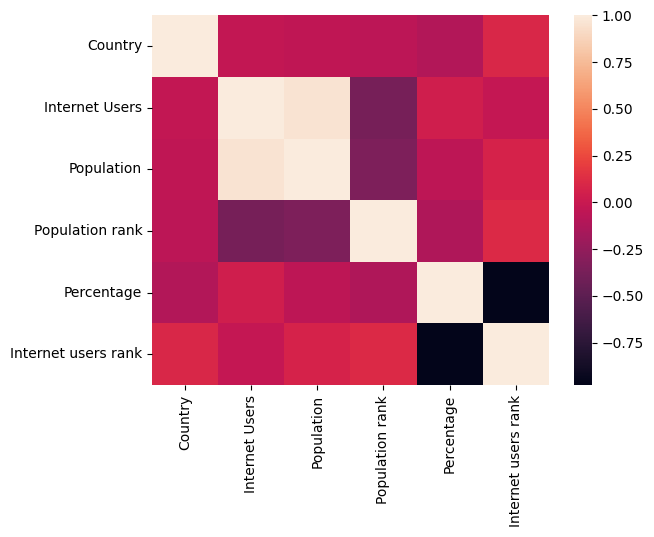

In [55]:
sns.heatmap(df_num.corr())

<Axes: >

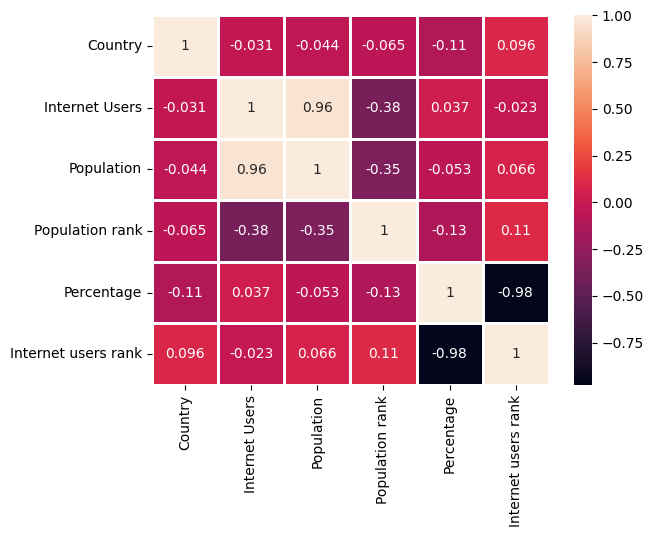

In [56]:
sns.heatmap(df_num.corr(),linewidths=1,annot=True)

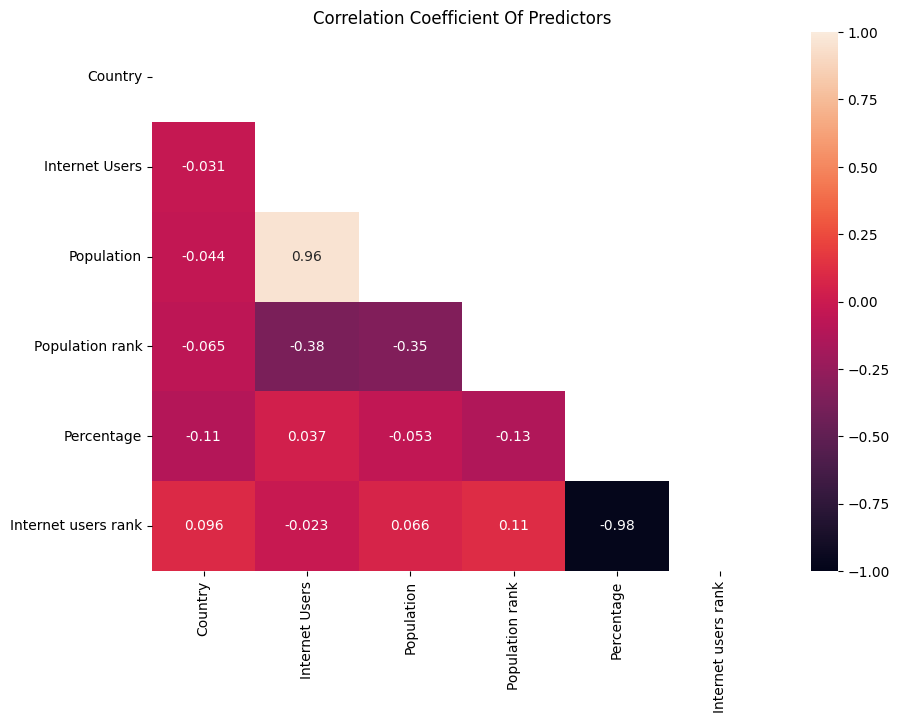

In [57]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

## **PAIRS OF EACH VARIABLES**

Identify the pairs of variables that are negatively correlated, positively correlated, or uncorrelated.



In [58]:
correlation_matrix=df_num.corr()
correlation_pairs=correlation_matrix.unstack()
correlation_pairs

Country              Country                1.000000
                     Internet Users        -0.030505
                     Population            -0.044489
                     Population rank       -0.065063
                     Percentage            -0.109699
                     Internet users rank    0.095986
Internet Users       Country               -0.030505
                     Internet Users         1.000000
                     Population             0.959814
                     Population rank       -0.377877
                     Percentage             0.036930
                     Internet users rank   -0.022842
Population           Country               -0.044489
                     Internet Users         0.959814
                     Population             1.000000
                     Population rank       -0.350031
                     Percentage            -0.053479
                     Internet users rank    0.065895
Population rank      Country               -0.

##**SORTING PAIRS**

In [59]:
sorted_pairs=correlation_pairs.sort_values()
sorted_pairs

Percentage           Internet users rank   -0.976793
Internet users rank  Percentage            -0.976793
Internet Users       Population rank       -0.377877
Population rank      Internet Users        -0.377877
                     Population            -0.350031
Population           Population rank       -0.350031
Percentage           Population rank       -0.126498
Population rank      Percentage            -0.126498
Country              Percentage            -0.109699
Percentage           Country               -0.109699
Country              Population rank       -0.065063
Population rank      Country               -0.065063
Percentage           Population            -0.053479
Population           Percentage            -0.053479
Country              Population            -0.044489
Population           Country               -0.044489
Internet Users       Country               -0.030505
Country              Internet Users        -0.030505
Internet users rank  Internet Users        -0.

## **GROUPING SORTED PAIRS**

Interpret the results of the Pearson correlation coefficient: values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate no correlation.

In [60]:
corr_matrix = df_num.corr()

positive_pairs = []
negative_pairs = []
no_correlation = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        correlation = corr_matrix.loc[col1, col2]
        if correlation > 0:
            positive_pairs.append((col1, col2, correlation))
        elif correlation < 0:
            negative_pairs.append((col1, col2, correlation))
        else:
            no_correlation.append((col1, col2, correlation))

df_positive = pd.DataFrame(positive_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
df_negative = pd.DataFrame(negative_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
df_no_correlation = pd.DataFrame(no_correlation, columns=['Column 1', 'Column 2', 'Correlation'])

print("Positive_pairs:")
print(df_positive)

print("Negative pairs:")
print(df_negative)


print("No correlation:")
print(df_no_correlation)



Positive_pairs:
          Column 1             Column 2  Correlation
0          Country  Internet users rank     0.095986
1   Internet Users           Population     0.959814
2   Internet Users           Percentage     0.036930
3       Population  Internet users rank     0.065895
4  Population rank  Internet users rank     0.111553
Negative pairs:
          Column 1             Column 2  Correlation
0          Country       Internet Users    -0.030505
1          Country           Population    -0.044489
2          Country      Population rank    -0.065063
3          Country           Percentage    -0.109699
4   Internet Users      Population rank    -0.377877
5   Internet Users  Internet users rank    -0.022842
6       Population      Population rank    -0.350031
7       Population           Percentage    -0.053479
8  Population rank           Percentage    -0.126498
9       Percentage  Internet users rank    -0.976793
No correlation:
Empty DataFrame
Columns: [Column 1, Column 2, Corre

In [61]:
df_positive

,Column 1,Column 2,Correlation
0,Country,Internet users rank,0.095986
1,Internet Users,Population,0.959814
2,Internet Users,Percentage,0.036930
3,Population,Internet users rank,0.065895
4,Population rank,Internet users rank,0.111553


In [62]:
df_negative

,Column 1,Column 2,Correlation
0,Country,Internet Users,-0.030505
1,Country,Population,-0.044489
2,Country,Population rank,-0.065063
3,Country,Percentage,-0.109699
4,Internet Users,Population rank,-0.377877
5,Internet Users,Internet users rank,-0.022842
6,Population,Population rank,-0.350031
7,Population,Percentage,-0.053479
8,Population rank,Percentage,-0.126498
9,Percentage,Internet users rank,-0.976793


In [63]:
df_no_correlation

,Column 1,Column 2,Correlation


##**SORTED HIGH CORRELATED**

In [64]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

Population           Internet Users         0.959814
Internet Users       Population             0.959814
Country              Country                1.000000
Population rank      Population rank        1.000000
Population           Population             1.000000
Internet Users       Internet Users         1.000000
Percentage           Percentage             1.000000
Internet users rank  Internet users rank    1.000000
dtype: float64

# **3.TARGET VARIABLE ANALYSIS**

### **INTERNET USERS**

###**CORRELATION VALUES**

In [65]:
df_num.corr()[['Internet Users']].sort_values('Internet Users', ascending=False)


,Internet Users
Internet Users,1.000000
Population,0.959814
Percentage,0.036930
Internet users rank,-0.022842
Country,-0.030505
Population rank,-0.377877


###**Relationship between variables**

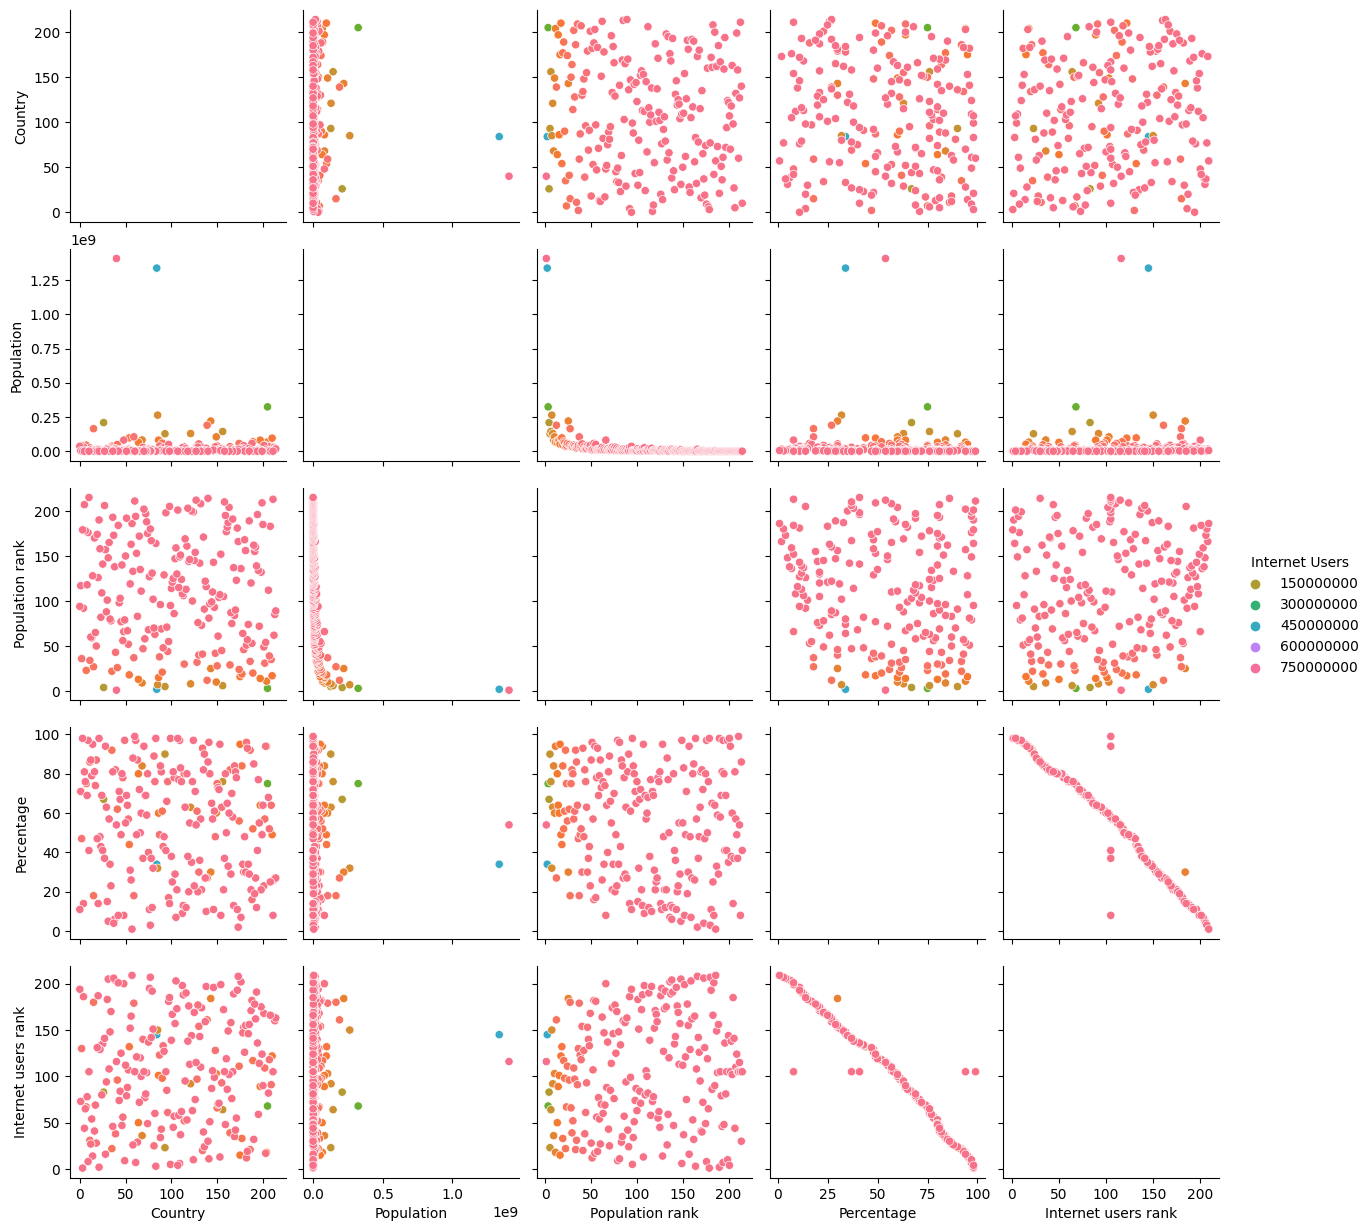

In [66]:
sns.pairplot(df_num,hue="Internet Users", palette="husl")

###**Strength of correlation**


<Axes: >

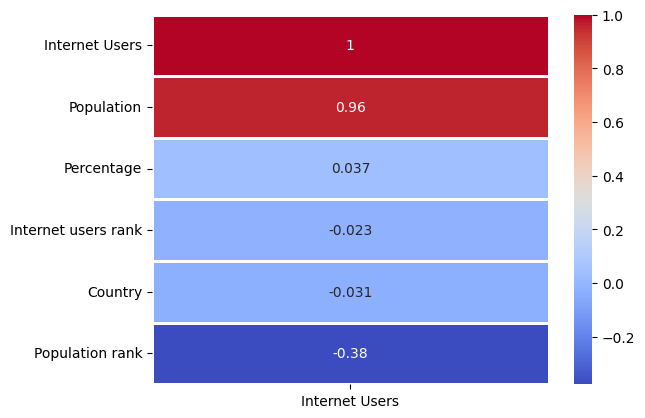

In [67]:
sns.heatmap(df_num.corr()[['Internet Users']].sort_values(by='Internet Users',ascending=False),linewidths=1,annot=True,cmap='coolwarm')

In statistics, correlation is a measure of the association between two variables. It can range from -1 to 1, where:

A value of -1 means a perfect negative correlation, i.e., as the value of one variable increases, the value of the other variable decreases.
A value of 0 means no correlation, i.e., there is no relationship between the two variables.
A value of 1 means a perfect positive correlation, i.e., as the value of one variable increases, the value of the other variable also increases.
So, positive correlation means that as one variable increases, the other variable also increases, while negative correlation means that as one variable increases, the other variable decreases. And, not correlated means that there is no relationship between the two variables.









###**Direction of correlation**

AttributeError: ignored

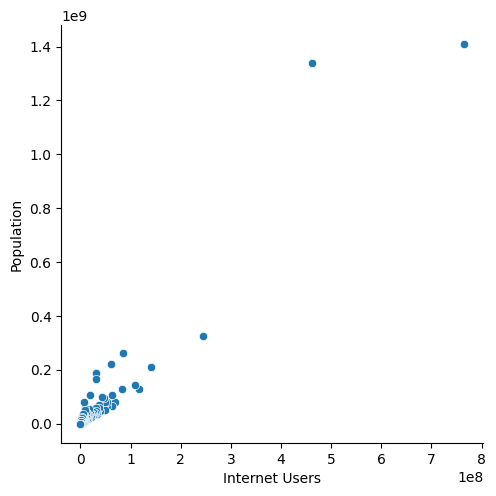

In [70]:
# Create a scatter plot matrix
sns.pairplot(df_num, x_vars=['Internet Users'],
             y_vars='Population', kind='scatter', height=5)

# Show plot
sns.show()


###**GROUPING CORRELATION**

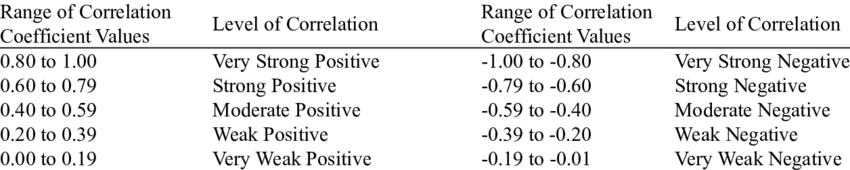

In [71]:
# Calculate the correlation matrix
corr_matrix = df_num.corr()

# Get the correlation coefficients of 'TAX TO GOVERNMENT' with other variables
tax_corr = corr_matrix['Internet Users'].drop('Internet Users')

# Define the correlation categories
categories = {
    'Very Strong Positive Correlation': (0.80, 1),
    'Strong Positive Correlation': (0.60, 0.79),
    'Moderate Positive Correlation': (0.40, 0.59),
    'Weak Positive Correlation': (0.20, 0.39),
    'Very Weak Positive Correlation': (0.00, 0.19),
    'Very Strong Negative Correlation': (-1.00, -0.80),
    'Strong Negative Correlation': (-0.79, -0.60),
    'Moderate Negative Correlation': (-0.59, -0.40),
    'Weak Negative Correlation': (-0.39, -0.20),
    'Very Weak Negative Correlation': (-0.19, 0.01)
}

# Create an empty dictionary to hold the dataframes
df_dict = {}

# Categorize the correlation coefficients and create a separate dataframe for each category
for category, (min_value, max_value) in categories.items():
    temp_df = tax_corr[(tax_corr >= min_value) & (tax_corr <= max_value)].to_frame()
    df_dict[category] = temp_df

# Print each dataframe
for category, df in df_dict.items():
    print(f"{category}:\n{df}\n")


Very Strong Positive Correlation:
            Internet Users
Population        0.959814

Strong Positive Correlation:
Empty DataFrame
Columns: [Internet Users]
Index: []

Moderate Positive Correlation:
Empty DataFrame
Columns: [Internet Users]
Index: []

Weak Positive Correlation:
Empty DataFrame
Columns: [Internet Users]
Index: []

Very Weak Positive Correlation:
            Internet Users
Percentage         0.03693

Very Strong Negative Correlation:
Empty DataFrame
Columns: [Internet Users]
Index: []

Strong Negative Correlation:
Empty DataFrame
Columns: [Internet Users]
Index: []

Moderate Negative Correlation:
Empty DataFrame
Columns: [Internet Users]
Index: []

Weak Negative Correlation:
                 Internet Users
Population rank       -0.377877

Very Weak Negative Correlation:
                     Internet Users
Country                   -0.030505
Internet users rank       -0.022842



# **4.Q & A**

Which variables have the strongest impact on the target variable?


*Internet Users and Population*

Is there a strong or weak correlation between the target variable and other variables?

*Strong correlation between Internet Users and Population*

What is the direction of the relationship between the target variable and other variables?

*Positive Relationship*

Can you identify any trends or patterns in the relationship between the target variable?

*Yes. as the values of one variable increase, the values of the target variable also tend to increase. This implies that there is a direct or positive correlation between the variables.*

Can you develop a model that can accurately capture the relationship between the target variable and other variables?

Yes

Can you use the relationship between the target variable and other variables to make predictions or generate insights?

Yes

------------------------------------------------------